In [1]:
import axographio
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

Let's import an example AxoGraph data file using `axographio.read()`:

In [2]:
f1 = axographio.read(axographio.example_files['axograph_x_format'])

Now let's plot the second column (current) against the first column (time):

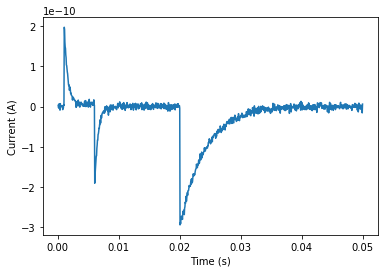

In [3]:
plt.figure()
plt.plot(f1.data[0], f1.data[1])
plt.xlabel(f1.names[0])
plt.ylabel(f1.names[1]);

To maximize import efficiency, the time column has type `linearsequence` and other columns have type `scaledarray`:

In [4]:
[type(f1.data[0]), type(f1.data[1])]

[axographio.extension.linearsequence, axographio.extension.scaledarray]

These types can be converted to NumPy or SciPy arrays easily:

In [5]:
times = np.asarray(f1.data[0])
times[:10]

array([  5.00000000e-05,   1.00000000e-04,   1.50000000e-04,
         2.00000000e-04,   2.50000000e-04,   3.00000000e-04,
         3.50000000e-04,   4.00000000e-04,   4.50000000e-04,
         5.00000000e-04])

# Exporting Data

Let's generate some data:

In [6]:
times = np.arange(0, 10, 0.0001)
column1 = np.sin(2*np.pi * 60 * times)
column2 = np.cos(2*np.pi * 60 * times)

Now let's write the data to an AxoGraph file using the `write()` method of the `axographio.file_contents` class:

In [7]:
f2 = axographio.file_contents(
    ['time (s)', 'my recording (V)', 'your recording (V)'],
    [times, column1, column2])
f2.write('my60Hz.axgx') # created in the current directory

Finally, let's import and plot the new file to verify it worked:

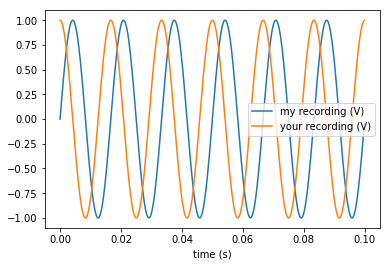

In [8]:
f3 = axographio.read('my60Hz.axgx')
plt.figure()
for d,n in zip(f3.data[1:], f3.names[1:]):
    plt.plot(f3.data[0][:1000], d[:1000], label=n)
plt.xlabel(f3.names[0])
plt.legend();